<a href="https://colab.research.google.com/github/Saha555339/Coursework-3rd-year/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

data = pd.read_csv("/content/Data_Deputies_Rating_2021_June_Passed.csv", index_col=0)
data.head()

,ФИО,Активность в ГД,Индекс народного голосования,Оценка экспертов,Индекс цитируемости,КПДГД,Прошел
0,Крашенинников Павел Владимирович,9.32,8.66,29.5,10.94,58.42,1
1,Хинштейн Александр Евсеевич,5.22,0.48,24.0,28.45,58.15,1
2,Нилов Ярослав Евгеньевич,14.91,10.63,24.0,8.21,57.75,1
3,Толстой Петр Олегович,0.37,13.27,29.0,13.87,56.51,1
4,Исаев Андрей Константинович,4.85,11.60,27.0,12.92,56.37,1


# Коэффициент Пирсона

<ipython-input-20-79bd9588b458>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', annot=True)


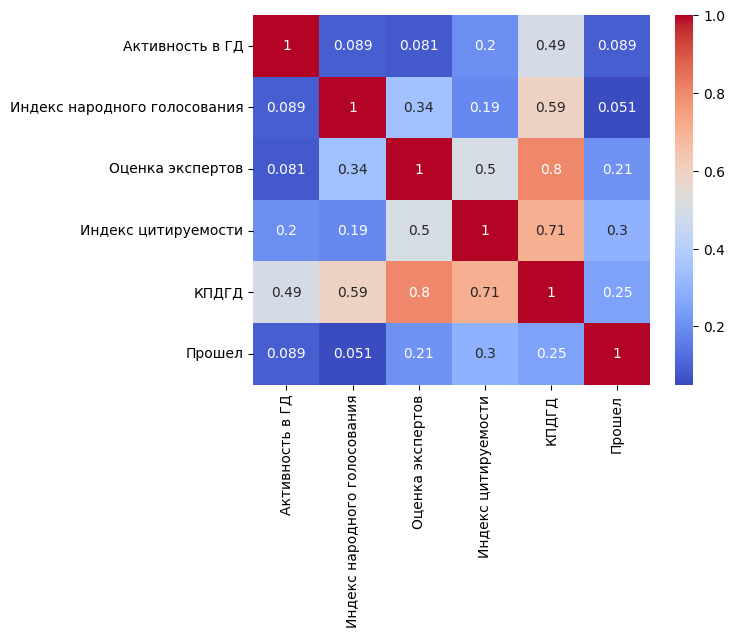

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

Матрица корреляций на основе коэффициента Пирсона показывает только линейную зависимость.

# MIC (minepy)

In [14]:
!pip install minepy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
def print_stats(mine):
    print("MIC", mine.mic())
    print("MAS", mine.mas())
    print("MEV", mine.mev())
    print("GMIC", mine.gmic())
    print("TIC", mine.tic())

***MIC (Maximal Information Coefficient)*** - это мера взаимной информации, которая измеряет степень нелинейной зависимости между двумя переменными. MIC находится в диапазоне от 0 до 1, где 0 означает отсутствие зависимости, а 1 - идеальную зависимость.


---


***MAS (Maximal Asymmetric Surprisal)*** - это мера взаимной информации, которая измеряет количество информации, которую переменная X сообщает о переменной Y, но которую Y не сообщает о X. MAS находится в диапазоне от 0 до бесконечности, где 0 означает отсутствие зависимости.


---


***MEV (Maximal Eigenvalue of the covariance matrix)*** - это мера, которая используется для оценки степени линейной зависимости между переменными. MEV также находится в диапазоне от 0 до 1, где 0 означает отсутствие зависимости, а 1 - идеальную зависимость.


---



***GMIC (Generalized Maximal Information Coefficient)*** - это усовершенствованная версия MIC, которая учитывает не только нелинейную зависимость между переменными, но и корреляцию между ними. GMIC также находится в диапазоне от 0 до 1, где 0 означает отсутствие зависимости, а 1 - идеальную зависимость.


---


***TIC (Total Information Coefficient)*** - это мера, которая измеряет общую степень зависимости между двумя переменными, включая линейную и нелинейную зависимость, а также зависимость от других переменных. TIC находится в диапазоне от 0 до 1, где 0 означает отсутствие зависимости, а 1 - идеальном случае.

In [16]:
import numpy as np
import minepy

mine = minepy.MINE(alpha=0.5, c=3, est="mic_approx")

X = np.asarray(data['Индекс народного голосования'])
Y = np.asarray(data['Прошел'])

mine.compute_score(X,Y)

print_stats(mine)

MIC 0.041890553280087804
MAS 0.03843063088069103
MEV 0.041890553280087804
GMIC 0.02488813120691084
TIC 0.4186607062715392


Параметр ***'alpha'*** контролирует чувствительность MINE к нелинейным зависимостям между переменными. Значение alpha по умолчанию равно 0.6, но для данных с рейтингом депутатов и значениями {1, 0} можно принять значение равное 0.5

---


Параметр ***'c'*** отвечает за количество бинов, используемых при расчете MINE. Оптимальное значение для 438 записей в таблице было принято за 5.


---


Параметр ***'est'*** отвечает за метод оценки MINE и может принимать значения *'mic_approx'*, *'mic_e'*, *'mas'*, *'gmic'*, *'tic'*, 'mcpp'. Для данных с рейтингом депутатов и значениями {1, 0} можно начать с метода **'mic_approx'**, который является быстрой и точной оценкой MINE для данных с малым числом уникальных значений.

In [17]:
from scipy.stats import norm


corr = mine.mic()
df = len(X) - 2
t = corr * ((len(X) - 2) / ((1 - corr**2) * df))**0.5
p_value = 2 * (1 - norm.cdf(abs(t)))

print("p-value:", p_value)

p-value: 0.9665566079294514


Здесь мы используем стандартный подход, когда ***p-value*** вычисляется как вероятность получения значения статистики, не меньше, чем наблюдаемое значение, при условии, что корреляции между двумя переменными нет (нулевая гипотеза). Для этого мы вычисляем статистику t-распределения, используя коэффициент корреляции, количество наблюдений и количество степеней свободы. Затем мы используем функцию norm.cdf() из библиотеки SciPy для вычисления вероятности получения значения статистики меньше, чем наблюдаемое значение.


---

Значение ***p_value*** очень близко к 1, значит мы можем с уверенностью сказать, что нулевая гипотеза принимается с достаточно большой вероятностью и никакой корреляции на данной выборке данных выявлено не было.

# Коеффициент Фишера

In [18]:
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(X, Y)

print("Коэффициент корреляции Фишера: ", corr)
print("p_value: ", p_value)

Коэффициент корреляции Фишера:  0.050578526182084985
p_value:  0.2908853697729455


***p_value*** - это вероятность получить такое или еще более экстремальное значение коэффициента корреляции, если бы нулевая гипотеза о том, что коэффициент равен 0, была верна. То есть, если p-значение мало, это говорит о том, что есть значимая корреляция между двумя переменными.


---


**Коэффициент корреляции Фишера** (corr) принимает значения от -1 до 1, где:
*   1 - полная положительная корреляция
*   0 - отсутствие корреляции
*  -1 - полная отрицательная корреляций

Значение коэффициента корреляции Фишера интерпретируется как мера силы связи между двумя переменными, где значения близкие к 1 или -1 указывают на сильную связь, а значения близкие к 0 указывают на отсутствие связи.


---

***p_value*** равно 0.29, что означает вероятность случайной ошибки при отвержении нулевой гипотезы достигает почти 30%, что достаточно велико для того, чтобы мы могли сказать, что никакой связи между значениями на данной выборке не наблюдается.

# Оценка зависимости с помощью логистической регрессии.

In [19]:
import statsmodels.api as sm

y = Y.reshape(-1, 1)
XLog = sm.add_constant(X.reshape(-1, 1))

model = sm.Logit(y, XLog).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.689199
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  438
Model:                          Logit   Df Residuals:                      436
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 Apr 2023   Pseudo R-squ.:                0.001850
Time:                        10:41:33   Log-Likelihood:                -301.87
converged:                       True   LL-Null:                       -302.43
Covariance Type:            nonrobust   LLR p-value:                    0.2901
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2888      0.166     -1.742      0.082      -0.614       0.036
x1             0.0381      0.

**Pseudo R-squ.:** значение псевдо R-квадрата. Это мера качества модели, которая показывает, какую долю дисперсии зависимой переменной объясняют независимые переменные.


---


**LL-Null:** значение логарифма правдоподобия модели, в которой зависимая переменная всегда равна нулю. Это значение используется для сравнения модели со значением LL-Null, чтобы оценить, насколько хорошо модель соответствует данным. Чем выше значение логарифма правдоподобия у модели, тем лучше модель соответствует данным.


---


**z:** значение z-статистики для каждого коэффициента. Z-статистика показывает, насколько значим коэффициент. Чем выше значение z-статистики, тем более значим коэффициент.


---


**coeff:** Коэффициент, отвечающий за независимую переменную (в данном случае рейтинг), говорит о силе зависимости между переменными. Значение этого коэффициента показывает, как сильно изменение рейтинга народного голосования влияет на вероятность прохождения депутата в следующий созыв.


---


**P>|z|:** p-значение для каждого коэффициента. Оно показывает, насколько значим коэффициент. Чем ниже значение p-значения, тем более значим коэффициент.

Итого мы получили совсем маленький коэффициент зависимости (coeff_x1) между рейтингом и прохождением в следующий созыв наряду с достаточно высоким значение P>|z|, что может говорит о том, что связь слишком слабая для того, чтобы можно было говорить о зависимости между прохождением в следующий созыв и народным рейтингом депутатов.